<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Bahar Dibaeinia
### Student Number : 99105442
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [31]:
#TODO
import sklearn
from sklearn.model_selection import train_test_split
df = pd.read_csv('heart_disease.csv')
target = df["target"].copy()
x = df.drop("target", axis=1)
target[target==0]=-1
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.2)
y_test


873     1
325     1
451     1
1015   -1
98     -1
       ..
373    -1
181     1
989     1
637     1
348    -1
Name: target, Length: 205, dtype: int64

### Adaboost Algorithm Implementation (40 points)

In [28]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    return (sum(w * (np.not_equal(y, y_pred)).astype(int)))/sum(w)

    

def calculate_alpha(error):
    return np.log((1 - error) / error)
    

def update_weights(w, alpha, y, y_pred):
    return w * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))
    

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                w = np.ones(len(y)) * 1 / len(y)
                 
            else:
                w = update_weights(w, alpha_m, y, y_pred)
               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            
            G_m = DecisionTreeClassifier(max_depth = 1)   #stump
            G_m.fit(X, y, sample_weight = w)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) 


            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            
            error_m = calculate_error(y, y_pred, w)
            self.training_errors.append(error_m)


            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            
            alpha_m = calculate_alpha(error_m)
            self.alphas.append(alpha_m)
            
        
        assert len(self.G_M) == len(self.alphas)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            #weak_preds.iloc[:,m] = y_pred_m
            weak_preds[weak_preds.columns[m]]=y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [36]:
#TODO : Fit model
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
model = AdaBoost()
model.fit(x_train, y_train, M = 200)

# Predict on test set


#TODO : Predict on test data
y_pred = model.predict(x_test)
y_pred


#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('f1:',f1_score(y_test,y_pred))

accuracy: 0.8926829268292683
precision: 0.8849557522123894
recall: 0.9174311926605505
f1: 0.9009009009009009


In [42]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
ada_model.fit(x_train, y_train)
y_pred = ada_model.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('f1:',f1_score(y_test,y_pred))

accuracy: 0.9658536585365853
precision: 0.9811320754716981
recall: 0.9541284403669725
f1: 0.9674418604651164


### Early Stopping (15 points)

In [43]:
#TODO : Calculate validation error for different number of estimators 
numbers=list(range(1,300))
val_errors = []
models=[]
for i in numbers:
    model = AdaBoost()
    model.fit(x_train, y_train, M = i)
    y_pred = model.predict(x_test)
    val_errors.append(1-accuracy_score(y_test,y_pred))
    models.append(model)
    
    


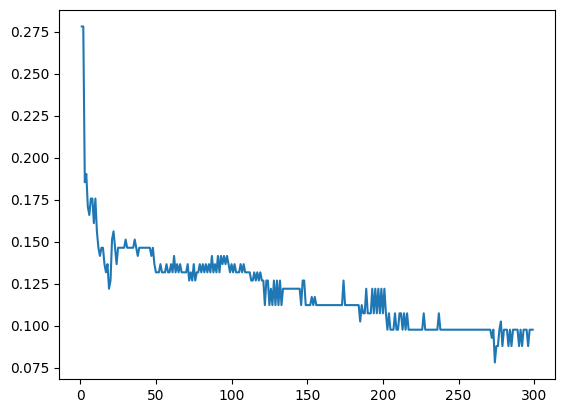

In [44]:
#TODO : Plot validation error versus number of estimators figure.
plt.plot(numbers, val_errors)
plt.show()

In [48]:
#TODO : Print the best number for estimators and minimum value for validation error.
min_error=min(val_errors)
print('best_number:', val_errors.index(min_error)+2)
print('min_error:', min_error)

best_number: 275
min_error: 0.07804878048780484


### Weighted Error (10 points)

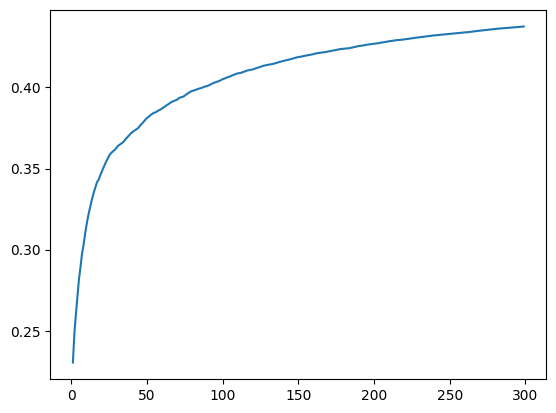

In [53]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
w_e = []
w2=[]
for m in models:
    w_e.append(np.sum(np.array(m.training_errors)*np.array(m.alphas))/np.sum(m.alphas))
    
plt.plot(numbers,w_e)
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

Since number of estimators increases, misclassified samples will get heavier and heavier weights so they will اhave a greater role in training error. Moreover, 'amount of say' of their estimators (alphas) will increase so the weighted error tend to increase. 